# Baza filmów 

Przedstawimy podsumowanie wyników głosowania na najlepszy film. Zestawienie zawiera m.in. informacje na temat tytułu, popularności, czasu trwania i daty premiery. Dostępne sa również informacje dotyczące budżetu oraz zysków z danej produkcji. W podsumowaniu możemy znaleźć zarówno ilość głosów oddanych na dany film jak i ich średnią wartość

Rozpoczniemy od wczystania odpowiednich bibliotek oraz danych.

In [1]:
# import bibliotek
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# wyświetlenie wykresów w notatniku
%matplotlib inline

In [3]:
# wczytywanie podsumowanie dla filmów
df_mov = pd.read_csv('tmdb_movies.csv', parse_dates=['release_date'])
# wczytywanie podsumowanie dla gatunków
df_gen = pd.read_csv('tmdb_genres.csv')

Podamy teraz listę dziesięciu najwyżej ocenianych filmów. Produkcje wybierzemy z filmów, które zdobyły znaczącą liczbę głosów. W tym przypadku "znacząca liczba głosów" jest rozumiana jako liczba głosów, która jest większa od trzeciego kwartyla rozkładu liczby głosów. W poniższej tabeli wyświetlimy wszystkie dostępne informacje na temat produkcji spełniających powyższe kryteria.

In [4]:
# Zwróć listę 10 najwyżej ocenianych filmów (vote_average), 
#których liczba głosów (vote_count) jest większa od 3. kwartyla rozkładu liczby głosów.

df_mov[df_mov.vote_count>np.quantile(df_mov.vote_count, 0.75)].nlargest(10, 'vote_average')


,Unnamed: 0,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id
1881,1881,25000000,NaN,278,en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,136.747729,1994-09-23,28341469,142.0,Released,Fear can hold you prisoner. Hope can set you f...,The Shawshank Redemption,8.5,8205,18.0
3337,3337,6000000,http://www.thegodfather.com/,238,en,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",143.659698,1972-03-14,245066411,175.0,Released,An offer you can't refuse.,The Godfather,8.4,5893,18.0
662,662,63000000,http://www.foxmovies.com/movies/fight-club,550,en,Fight Club,A ticking-time-bomb insomniac and a slippery s...,146.757391,1999-10-15,100853753,139.0,Released,Mischief. Mayhem. Soap.,Fight Club,8.3,9413,18.0
1818,1818,22000000,http://www.schindlerslist.com/,424,en,Schindler's List,The true story of how businessman Oskar Schind...,104.469351,1993-11-29,321365567,195.0,Released,"Whoever saves one life, saves the world entire.",Schindler's List,8.3,4329,18.0
2294,2294,15000000,http://movies.disney.com/spirited-away,129,ja,千と千尋の神隠し,A ten year old girl who wanders away from her ...,118.968562,2001-07-20,274925095,125.0,Released,The tunnel led Chihiro to a mysterious town...,Spirited Away,8.3,3840,14.0
2731,2731,13000000,NaN,240,en,The Godfather: Part II,In the continuing saga of the Corleone crime f...,105.792936,1974-12-20,47542841,200.0,Released,"I don't feel I have to wipe everybody out, Tom...",The Godfather: Part II,8.3,3338,18.0
3232,3232,8000000,NaN,680,en,Pulp Fiction,"A burger-loving hit man, his philosophical par...",121.463076,1994-10-08,213928762,154.0,Released,Just because you are a character doesn't mean ...,Pulp Fiction,8.3,8428,53.0
3865,3865,3300000,http://sonyclassics.com/whiplash/,244786,en,Whiplash,"Under the direction of a ruthless instructor, ...",192.528841,2014-10-10,13092000,105.0,Released,The road to greatness can take you to the edge.,Whiplash,8.3,4254,18.0
65,65,185000000,http://thedarkknight.warnerbros.com/dvdsite/,155,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,187.322927,2008-07-16,1004558444,152.0,Released,Why So Serious?,The Dark Knight,8.2,12002,18.0
690,690,60000000,http://thegreenmile.warnerbros.com/,497,en,The Green Mile,A supernatural tale set on death row in a Sout...,103.698022,1999-12-10,284600000,189.0,Released,Miracles do happen.,The Green Mile,8.2,4048,14.0


## Średni przychód i średni budżet

Zajmiemy się teraz opisem średniego budżetu i średniego przychodu filmów wyprodukowanych w latach 2010-2016. 
Rozpoczniemy od wybrania odpowiednich danych. Zrobimy to na dwa sposoby.

In [39]:
# Pogrupuj tabelę w taki sposób, aby otrzymać średni przychód (revenue) oraz średni budżet (budget) w danym roku
# dla filmów opublikowanych od 2010 (włącznie) do 2016 roku (włącznie). Następnie na tej podstawie stwórz wykres, 
# w którym średnie przychody są wykresem kolumnowym, a średni budżet wykresem liniowym na tych samych osiach. 
# Sformatuj odpowiednio oś X oraz oś Y. Dodaj tytuł wykresu, oraz legendę, 
# która znajduje się w prawym górnym rogu płótna, lecz poza obszarem osi.


In [17]:
# Pierwszy sposób
df_mov['year'] = pd.DatetimeIndex(df_mov['release_date']).year 
df_mov['year']

0       2009.0
1       2007.0
2       2015.0
3       2012.0
4       2012.0
         ...  
4798    1992.0
4799    2011.0
4800    2013.0
4801    2012.0
4802    2005.0
Name: year, Length: 4803, dtype: float64

In [18]:
df_mov_gr = df_mov[(df_mov['year'] >=2010) & (df_mov['year']<=2016)].groupby(['year']).mean('revenue','budget')
df_mov_gr.head()

,Unnamed: 0,budget,id,popularity,revenue,runtime,vote_average,vote_count,genre_id
year,,,,,,,,,
2010.0,2316.884444,3.449541e+07,42232.791111,21.340839,9.043811e+07,105.088889,5.968000,792.106667,658.888393
2011.0,2333.426009,3.477232e+07,62532.973094,21.944447,9.200413e+07,103.744395,6.011211,783.991031,608.955157
2012.0,2399.163462,3.492203e+07,91095.230769,25.527071,1.160659e+08,103.187500,5.909615,1105.668269,522.970874
2013.0,2449.978355,3.552329e+07,144291.632035,28.135912,1.013485e+08,105.268398,6.089177,1135.939394,613.086957
2014.0,2608.378151,3.095989e+07,223895.970588,37.480126,1.013466e+08,102.113445,5.578992,1046.163866,1243.267241


In [19]:
# Drugi sposób
df_mov[(df_mov.release_date.dt.year<=2016) & (df_mov.release_date.dt.year>=2010)]

,Unnamed: 0,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id,year
2,2,245000000,http://www.sonypictures.com/movies/spectre/,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466,28.0,2015.0
3,3,250000000,http://www.thedarkknightrises.com/,49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,28.0,2012.0
4,4,260000000,http://movies.disney.com/john-carter,49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,Released,"Lost in our world, found in another.",John Carter,6.1,2124,28.0,2012.0
6,6,260000000,http://disney.go.com/disneypictures/tangled/,38757,en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,2010-11-24,591794936,100.0,Released,They're taking adventure to new lengths.,Tangled,7.4,3330,16.0,2010.0
7,7,280000000,http://marvel.com/movies/movie/193/avengers_ag...,99861,en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,2015-04-22,1405403694,141.0,Released,A New Age Has Come.,Avengers: Age of Ultron,7.3,6767,28.0,2015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4787,4787,0,NaN,86304,en,All Superheroes Must Die,"Masked vigilantes Charge (Jason Trost), Cutthr...",3.545991,2011-10-26,0,78.0,Released,May The Best Man Win,All Superheroes Must Die,4.2,13,878.0,2011.0
4794,4794,0,NaN,286939,en,Sanctuary: Quite a Conundrum,"It should have been just a normal day of sex, ...",0.166513,2012-01-20,0,82.0,Released,NaN,Sanctuary: Quite a Conundrum,0.0,0,53.0,2012.0
4799,4799,9000,NaN,72766,en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,2011-12-26,0,85.0,Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,35.0,2011.0
4800,4800,0,http://www.hallmarkchannel.com/signedsealeddel...,231617,en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,2013-10-13,0,120.0,Released,NaN,"Signed, Sealed, Delivered",7.0,6,35.0,2013.0


In [20]:
# df_mov.dtypes

Sporządzimy teraz histogram przedstawiający średni budżet i średnie przychody dla produkcji z lat 2010-2016.

Text(0.5, 1.0, 'Średnie przychody i budżety filmów w latach 2010-2016')

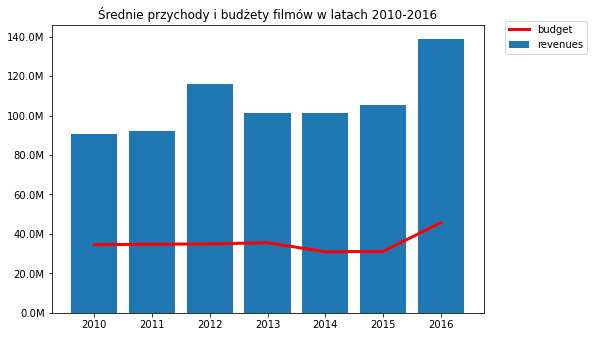

In [24]:
# Funkcja potrzebna do wypisania danych na osi Y 
def million(x, pos):
        return '{:2.1f}M'.format(x*1e-6)
    
fig = plt.figure()
# położenie osi
axes = fig.add_axes([0,0,1,1])
# podpisy na osiach
years =  np.arange(2010,2017)
money = [20e6, 40e6, 60e6, 80e6, 100e6, 120e6, 140e6]
formatter = plt.FuncFormatter(million)
axes.yaxis.set_major_formatter(formatter)
# wykres słupkowy
axes.bar(years, df_mov_gr.revenue, label='revenues')
# wykres liniowy
axes.plot(years, df_mov_gr.budget,label='budget',color='red',linewidth=3)
# legenda
axes.legend(loc=(1.05,0.9))
# tytuł wykresu
axes.set_title('Średnie przychody i budżety filmów w latach 2010-2016')






Zauważmy, że średnie budżety filmów są poniżej 50% średnich przychodów z produkcji. 

## Gatunki filmów

Zajmiemy się teraz analizą gatunków filmów. W oryginalnej tabeli występuje jedynie id gatunku, zaś jego wyjaśnienie znajduje się w innej tabeli. Rozpoczniemy więc od połączenia odpowiednich tabel.

In [28]:
# Wczytanie objaśnień do tabeli
df_gen.head()

,Unnamed: 0,genres
0,28.0,Action
1,12.0,Adventure
2,14.0,Fantasy
3,16.0,Animation
4,878.0,Science Fiction


Zauważmy, że tabela zawiera kolumnę o nazwie: "Unnamed: 0". Zmienimy nazwę kolumny, tak aby w obu tabelach były identyczne nazwy kolumn, a następnie połączymy tabele.

In [88]:
# Baza filmów zawiera kolumnę z id gatunku (genre_id). Na tej podstawie połącz ze sobą bazę filmów z bazą gatunków, 
# tak aby w bazie filmów można było odczytać nazwę gatunku filmu.

col_name = df_gen.columns[0]
df_gen.rename(columns={col_name: "genre_id"},inplace=True)
df_gen.head


<bound method NDFrame.head of     genre_id           genres
0       28.0           Action
1       12.0        Adventure
2       14.0          Fantasy
3       16.0        Animation
4      878.0  Science Fiction
5       18.0            Drama
6       53.0         Thriller
7    10751.0           Family
8       35.0           Comedy
9       36.0          History
10   10752.0              War
11      37.0          Western
12   10749.0          Romance
13      80.0            Crime
14    9648.0          Mystery
15      27.0           Horror
16      99.0      Documentary
17   10402.0            Music
18   10770.0         TV Movie
19       NaN              NaN
20   10769.0          Foreign>

In [30]:
df = pd.merge(df_mov, df_gen ,how='outer',on='genre_id' ) 
df.head()

,Unnamed: 0,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id,year,genres
0,0,237000000,http://www.avatarmovie.com/,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800,28.0,2009.0,Action
1,2,245000000,http://www.sonypictures.com/movies/spectre/,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466,28.0,2015.0,Action
2,3,250000000,http://www.thedarkknightrises.com/,49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,28.0,2012.0,Action
3,4,260000000,http://movies.disney.com/john-carter,49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,Released,"Lost in our world, found in another.",John Carter,6.1,2124,28.0,2012.0,Action
4,7,280000000,http://marvel.com/movies/movie/193/avengers_ag...,99861,en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,2015-04-22,1405403694,141.0,Released,A New Age Has Come.,Avengers: Age of Ultron,7.3,6767,28.0,2015.0,Action


In [36]:
#Jaki gatunek filmu z bazy pojawia się w niej najczęściej? Ile filmów tego gatunku znajduje się w bazie?
df_genres = df.groupby(['genres']).count()
df_genres

,Unnamed: 0,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id,year
genres,,,,,,,,,,,,,,,,,,
Action,754,754,261,754,754,754,754,754,754,754,754,754,656,754,754,754,754,754
Adventure,339,339,160,339,339,339,339,339,339,339,339,339,312,339,339,339,339,339
Animation,123,123,70,123,123,123,123,123,123,123,123,123,111,123,123,123,123,123
Comedy,1042,1042,323,1042,1042,1042,1042,1042,1042,1042,1042,1042,871,1042,1042,1042,1042,1042
Crime,195,195,70,195,195,195,195,195,195,195,195,195,166,195,195,195,195,195
Documentary,89,89,42,89,89,89,87,89,89,89,88,89,39,89,89,89,89,89
Drama,1207,1207,406,1207,1207,1207,1206,1207,1207,1207,1206,1207,920,1207,1207,1207,1207,1207
Family,56,56,27,56,56,56,56,56,56,56,56,56,41,56,56,56,56,56
Fantasy,117,117,55,117,117,117,117,117,117,117,117,117,108,117,117,117,117,117


In [37]:
mode_genre = df_genres['id'].max()
mode_genre

1207

In [46]:
mode_genre_id = df_genres.where(df_genres['id'] == mode_genre)['genre_id']
print(mode_genre_id.dropna())

genres
Drama    1207.0
Name: genre_id, dtype: float64


Najczęściej pojawia się gatunek dramat (1207 razy)

In [56]:
#Filmy, którego gatunku trwają średnio najdłużej 
df_runtime = df.groupby(['genres']).mean()['runtime']
runtime_max = df_runtime.max()
print(runtime_max)

133.96


In [69]:
# Zamieniamy na ramkę danych
df_runtime = pd.DataFrame({'genres':df_runtime.index, 'runtime':df_runtime.values})
df_runtime

,genres,runtime
0,Action,109.058355
1,Adventure,113.061947
2,Animation,89.552846
3,Comedy,100.464491
4,Crime,112.143590
5,Documentary,93.511364
6,Drama,115.521559
7,Family,89.803571
8,Fantasy,106.487179
9,Foreign,83.000000


In [74]:
# Wyznaczamy gatunek odpowiadający największej średniej długości trwania
max_genre_runtime = df_runtime.where(df_runtime['runtime'] == runtime_max)['genres']
print(max_genre_runtime.dropna())


10    History
Name: genres, dtype: object


Średnio filmy historyczne trwają najdłużej: 133.96 minut

Text(0.5, 1.0, 'Średni czas trwania filmów historyczych')

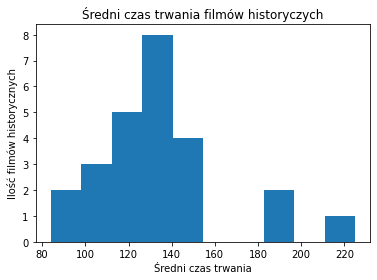

In [99]:
#Stwórz histogram czasu trwania filmów z gatunku, który cechuje się największym średnim czasem trwania.
#Pierwsza możliwość - odczyt z tabeli oryginalnej
#history_runtime = df_mov[df_mov['genre_id']== 36.0]['runtime']
#Druga możliwość - odczyt z tabeli z dodaną kolumną "genres"
history_runtime = df[df['genres'] == 'History']['runtime']
plt.hist(history_runtime)
plt.xlabel('Średni czas trwania')
plt.ylabel('Ilość filmów historycznych')
plt.title('Średni czas trwania filmów historyczych')